In [ ]:
!pip install tensorflow opencv-python pillow

In [2]:
import tensorflow as tf
import cv2
import numpy as np
from IPython.display import display, Image

In [ ]:
model = tf.keras.applications.MobileNetV2(weights='imagenet')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


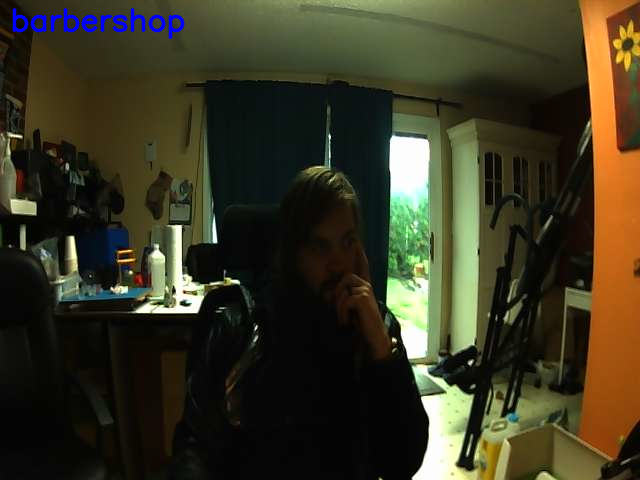

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


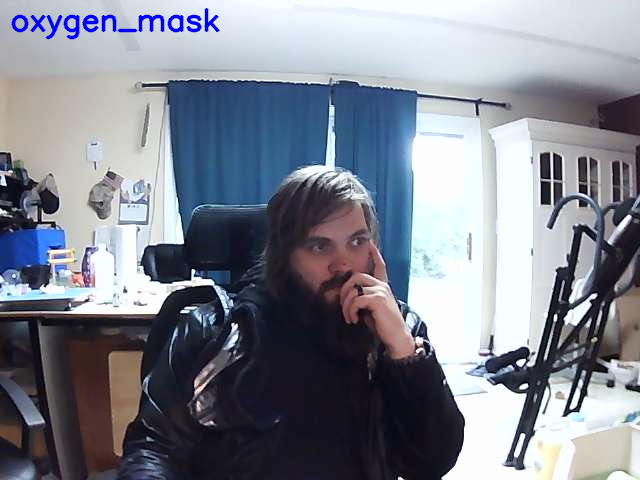

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


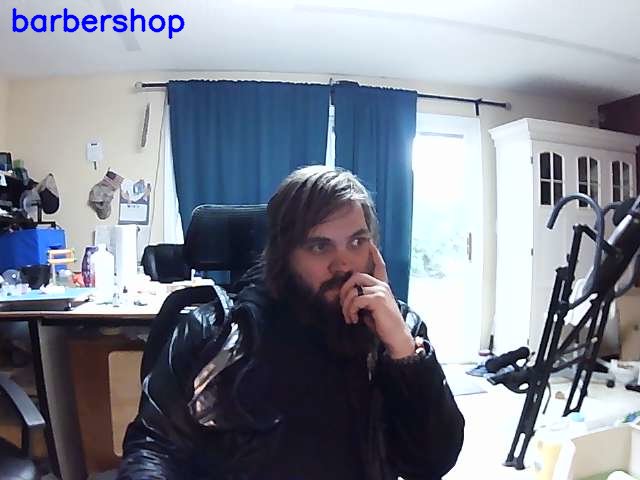

In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from IPython.display import display, Image
import PIL.Image

# Load pre-trained model
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Open webcam
cap = cv2.VideoCapture(0)  # 0 indicates the default camera

def get_frame():
    ret, frame = cap.read()
    if not ret:
        return None
    return frame

def preprocess_frame(frame):
    img = cv2.resize(frame, (224, 224))
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

def classify_frame(frame):
    img = preprocess_frame(frame)
    predictions = model.predict(img)
    decoded_predictions = decode_predictions(predictions, top=1)[0][0]
    return decoded_predictions

def display_frame(frame, classification):
    cv2.putText(frame, classification[1], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    img = PIL.Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    display(img)

# go a few times 
iterations = 3
while iterations > 0:
    frame = get_frame()
    if frame is None:
        break
    classification = classify_frame(frame)
    display_frame(frame, classification)
    iterations -= 1
    
cap.release()
